In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data=pd.read_csv("car data.csv")
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
## Drop the Duplicates from the data first

In [5]:
data=data.drop_duplicates()


In [6]:
data.shape

(299, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Checking and Removing Null values

In [10]:
#checking the null values...
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [12]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


## let's check the outlier in the dataset....

<Axes: >

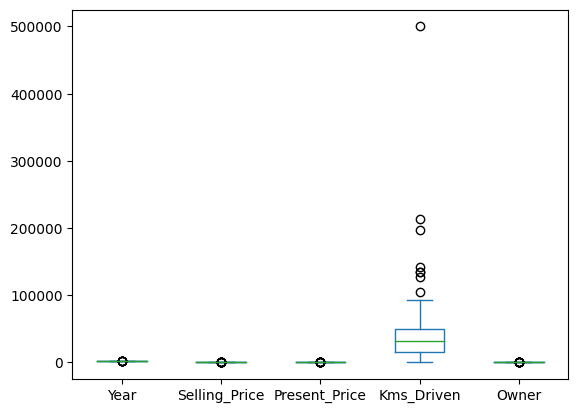

In [13]:
data.plot(kind="box")

we can clear see that kms_Driven has many outlier we need to remove these outliers

In [14]:
def outlier_remove(data,column_name):
    m=np.mean(data[column_name])
    std=np.std(data[column_name])
    cutoff=3*std
    lower,uper=m-cutoff,m+cutoff
    lower_outlier_index=data[data[column_name]<lower].index
    uper_outlier_index=data[data[column_name]>uper].index
    data=data.drop(lower_outlier_index,axis=0)
    data=data.drop(uper_outlier_index,axis=0)
    return data

In [15]:
data=outlier_remove(data,"Kms_Driven")

<Axes: >

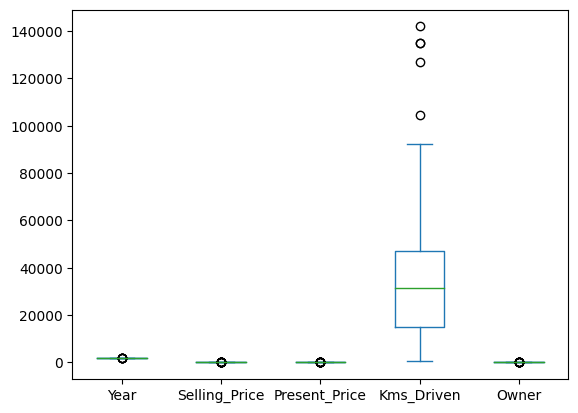

In [16]:
data.plot(kind="box")

In [17]:
## if there is still outlier excute the function again as the mean and std also updated

In [18]:
data=outlier_remove(data,"Kms_Driven") 

In [19]:
data.shape

(292, 9)

<Axes: >

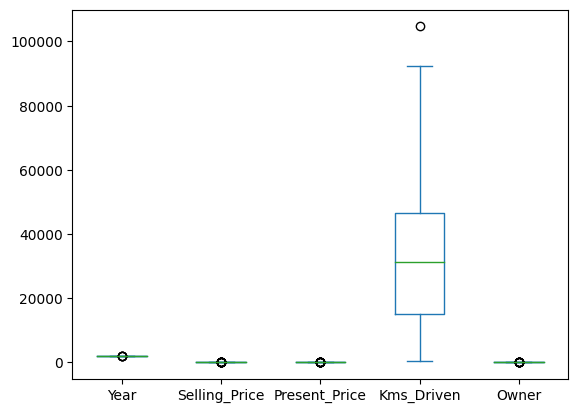

In [20]:
data.plot(kind="box")

In [21]:
data=outlier_remove(data,"Kms_Driven") 

<Axes: >

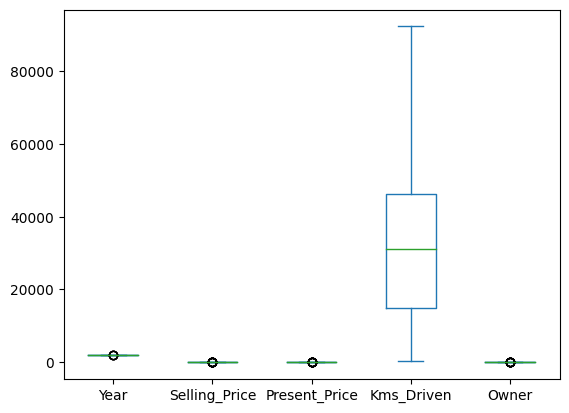

In [22]:
data.plot(kind="box")

Now we can see that now there is no outlier present in the data

## Lets handle the categorical features with EDA

In [23]:
data["Car_Name"].value_counts()

city                      26
corolla altis             16
verna                     14
brio                      10
ciaz                       9
                          ..
Bajaj Pulsar 135 LS        1
Activa 4g                  1
Honda CB Unicorn           1
Hero Honda CBZ extreme     1
Bajaj Pulsar  NS 200       1
Name: Car_Name, Length: 95, dtype: int64

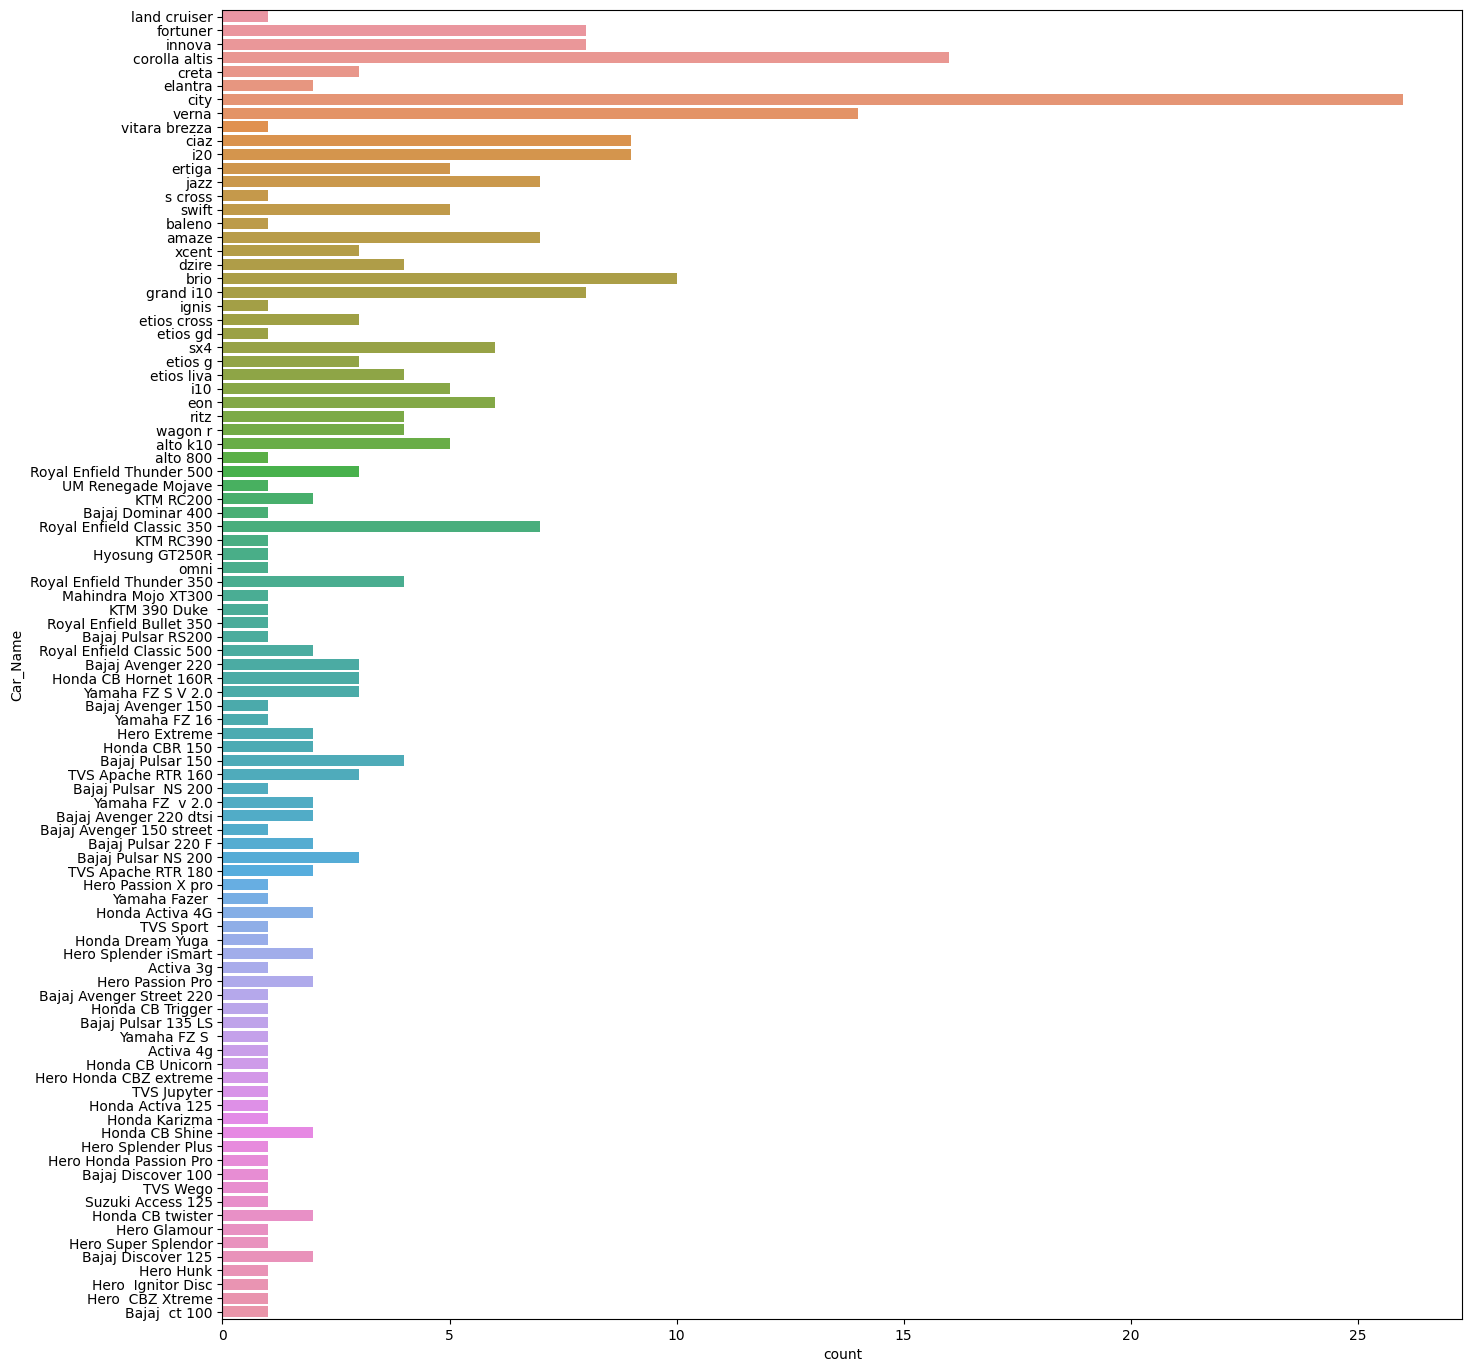

In [24]:
plt.figure(figsize=(16,17))
sns.countplot(y="Car_Name",data=data.sort_values("Selling_Price",ascending=False))
plt.show()

In [25]:
data.groupby("Car_Name")["Selling_Price"].sum().sort_values(ascending=False)

Car_Name
city                   192.90
fortuner               151.64
corolla altis          114.93
innova                 111.51
verna                   85.51
                        ...  
Hero Super Splendor      0.20
Hero  CBZ Xtreme         0.20
Hero  Ignitor Disc       0.20
Hero Hunk                0.20
Bajaj  ct 100            0.18
Name: Selling_Price, Length: 95, dtype: float64

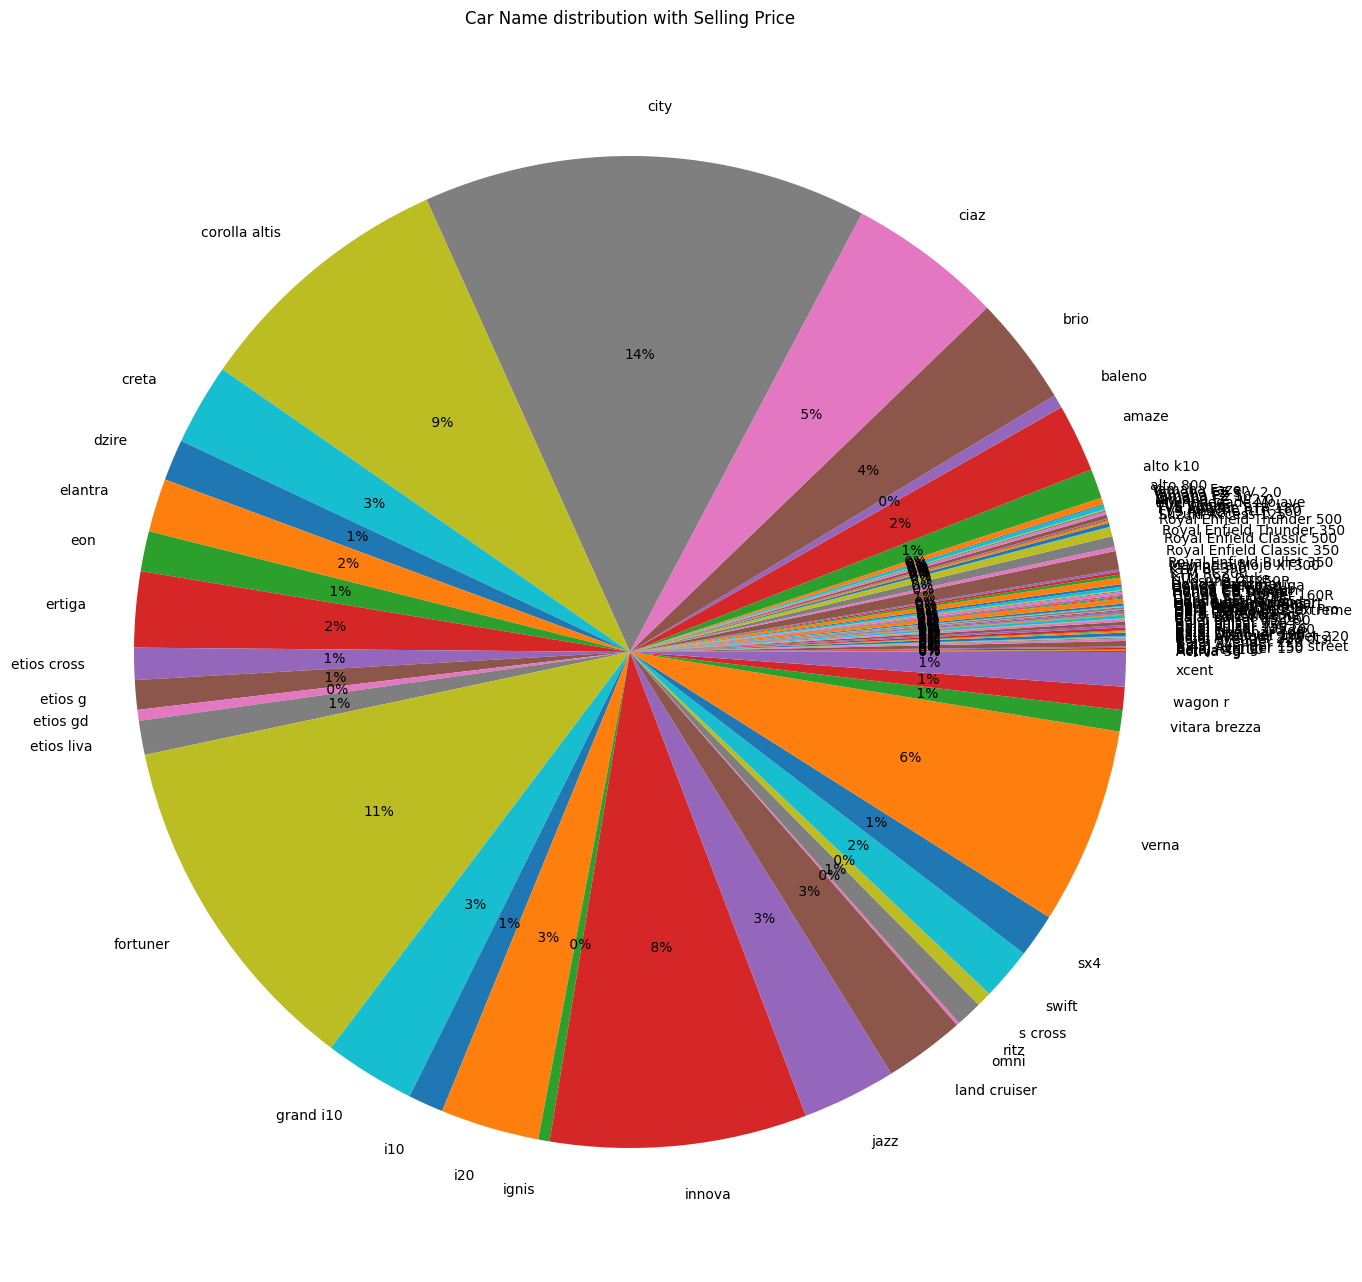

In [26]:
#let's see the distribution with selling price
plt.figure(figsize=(16,17))
value=data.groupby("Car_Name")["Selling_Price"].sum().values
index=data.groupby("Car_Name")["Selling_Price"].sum().index
plt.title("Car Name distribution with Selling Price")
plt.pie(value,labels=index,autopct="%2.f%%")
# plt.legend()
plt.show()

## Observation:
1. *city* car has the most Selling price among all the cars
2. *Fortuner* has the 2nd most selling price
3. *corolla altis* has the 3rd most selling price
4. *bajaj ct 100* has the lowest selling price

<Figure size 1600x1600 with 0 Axes>

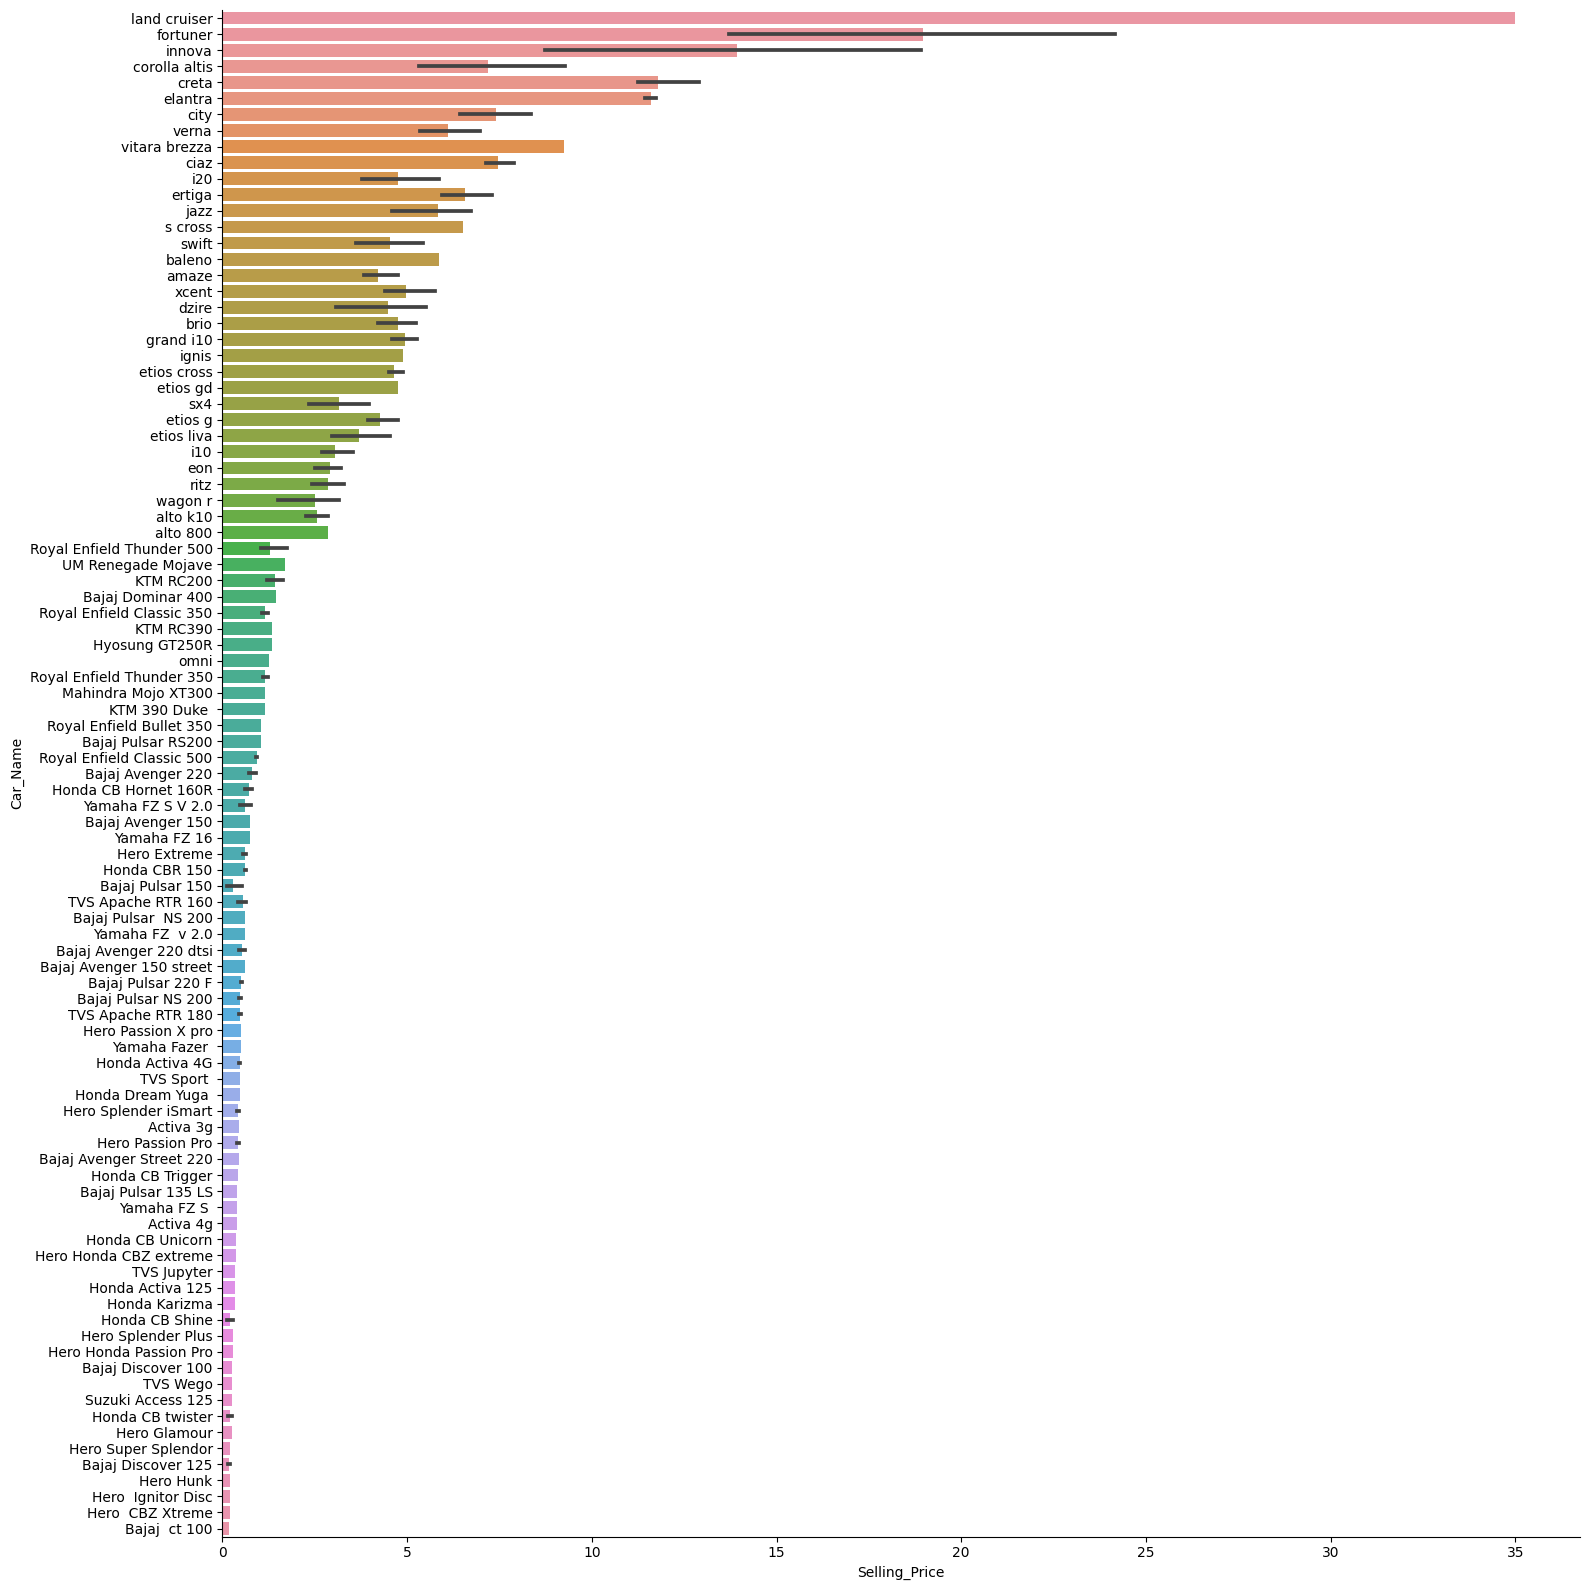

In [27]:
#visulization using catplot
plt.figure(figsize=(16,16))
sns.catplot(y="Car_Name",x="Selling_Price",data=data.sort_values("Selling_Price",ascending=False),kind="bar",height=16)

## Observation:
1. *land cruiser* has the maximum selling price
2. *fortuner* has the 2nd maximum selling Price
3. *inova* has the 3rd maximum selling price
4. *bjaj ct 100* has the minimum selling price

In [28]:
c_value=data["Car_Name"].value_counts()
main_car=c_value[c_value>7]

In [29]:
def other_car(x):
        if x in main_car:
            return x
        else:
            return "Other Car"
    

In [30]:
data["Car_Name"]=data["Car_Name"].apply(other_car)

In [31]:
data["Car_Name"].value_counts()

Other Car        183
city              26
corolla altis     16
verna             14
brio              10
ciaz               9
i20                9
fortuner           8
innova             8
grand i10          8
Name: Car_Name, dtype: int64

In [32]:
data=pd.get_dummies(data,columns=["Car_Name"],drop_first=True)

In [33]:
data.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0


In [34]:
data["Year"].value_counts()

2015    60
2016    49
2014    38
2017    35
2013    32
2012    22
2011    19
2010    14
2009     6
2008     6
2006     3
2005     3
2007     2
2018     1
2003     1
Name: Year, dtype: int64

In [35]:
data["Number_of_Years"]=2023-data["Year"]

In [36]:
data.head(4)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,0,0,0,0,0,0,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,12


<Axes: xlabel='count', ylabel='Year'>

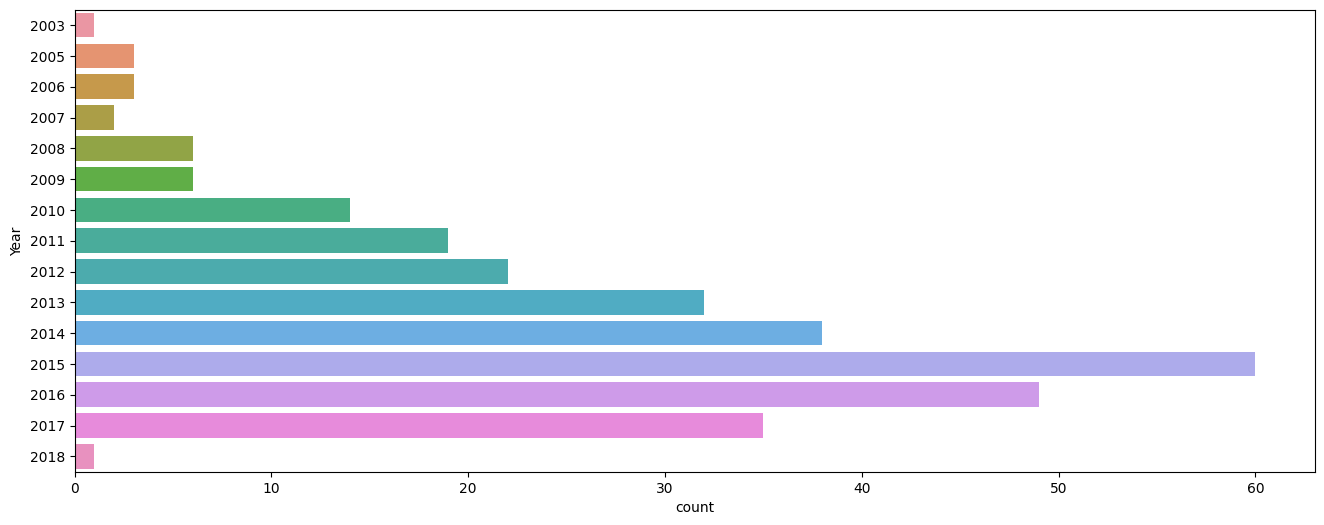

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(y=data["Year"])

## Observation
1. 2015 is the most selling year
2. 2017 is 2nd most selling year
3. 2003 is least selling year

In [38]:
data.groupby("Year")["Selling_Price"].sum().sort_values(ascending=False)

Year
2015    338.55
2016    252.91
2017    217.32
2014    180.96
2013    100.85
2010     78.63
2012     73.45
2011     45.13
2009     16.90
2018      9.25
2008      6.85
2005      6.46
2006      3.25
2003      2.25
2007      0.32
Name: Selling_Price, dtype: float64

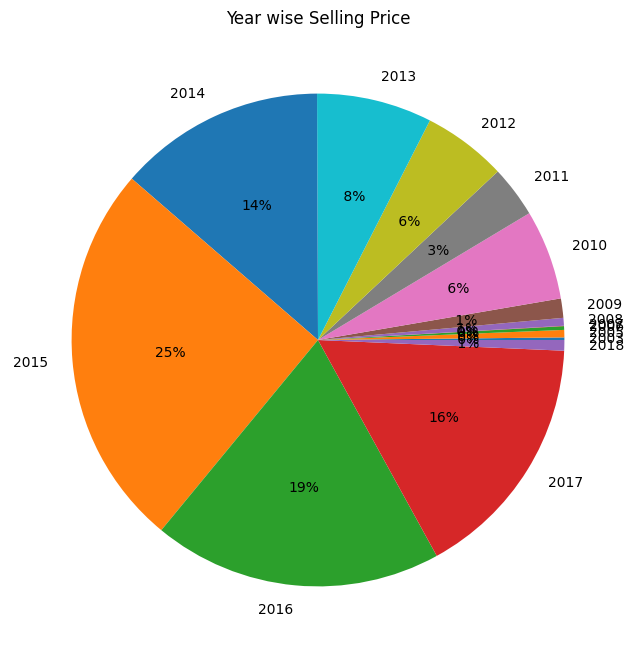

In [39]:
## Year wise selling 
plt.figure(figsize=(16,8))
value=data.groupby("Year")["Selling_Price"].sum().values
index=data.groupby("Year")["Selling_Price"].sum().index
plt.title("Year wise Selling Price")
plt.pie(value,labels=index,autopct="%2.f%%")
# plt.legend()
plt.show()

## observation:
more than 50% selling was done in only 2015,2016 and 2017

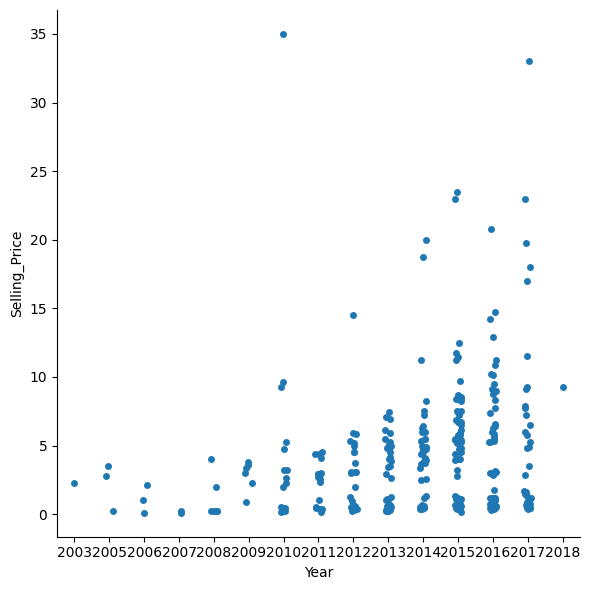

In [40]:
sns.catplot(x="Year",y="Selling_Price",data=data.sort_values("Selling_Price",ascending=False),height=6)

## Observation:
    maximum selling price was in 2010 but most frequent in 2015

In [41]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,0,0,0,0,0,0,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,9


In [42]:
data=data.drop("Year",axis=1)

In [43]:
## now explore the another categorical feature Fuel_Type
data["Fuel_Type"].value_counts()

Petrol    234
Diesel     55
CNG         2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='count', ylabel='Fuel_Type'>

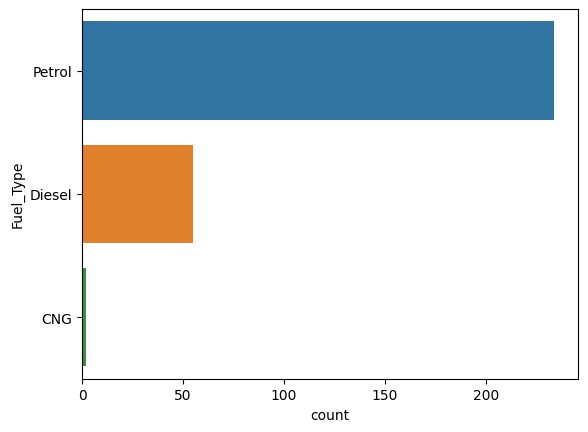

In [44]:
sns.countplot(y=data["Fuel_Type"])

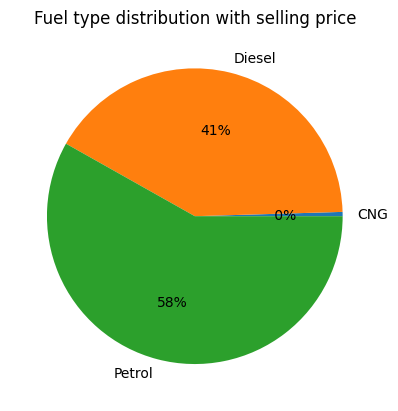

In [45]:
##let's see the distribution with selling price
plt.title("Fuel type distribution with selling price")
index=data.groupby("Fuel_Type")["Selling_Price"].sum().index
value=data.groupby("Fuel_Type")["Selling_Price"].sum().values
# plt.legend()
plt.pie(value,labels=index,autopct="%2.f%%")
plt.show()


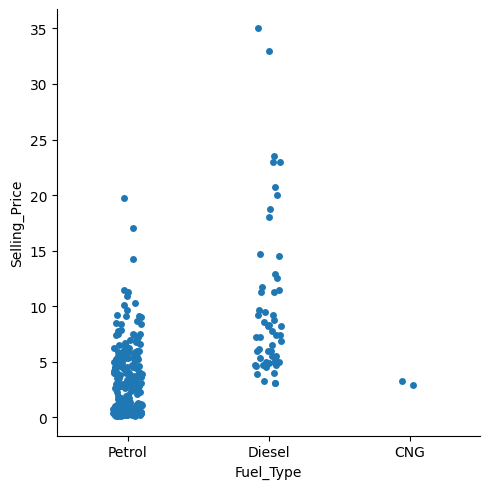

In [46]:
sns.catplot(x="Fuel_Type",y="Selling_Price",data=data)
plt.show()

## observation:
Maximum selling point in Diesel but most Selling from the Petrol

In [47]:
data=pd.get_dummies(data,columns=["Fuel_Type"],drop_first=True)

In [48]:
data.head(1)

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,Dealer,Manual,0,0,0,0,0,0,0,0,0,0,9,0,1


In [49]:
##let's explore Seller Type
data["Seller_Type"].value_counts()

Dealer        190
Individual    101
Name: Seller_Type, dtype: int64

<Axes: xlabel='count', ylabel='Seller_Type'>

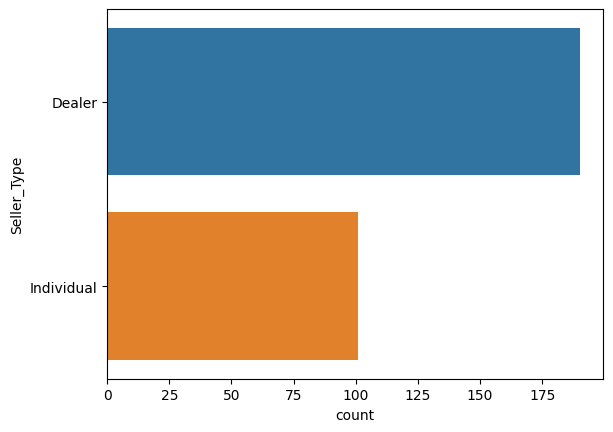

In [50]:
sns.countplot(y=data["Seller_Type"])

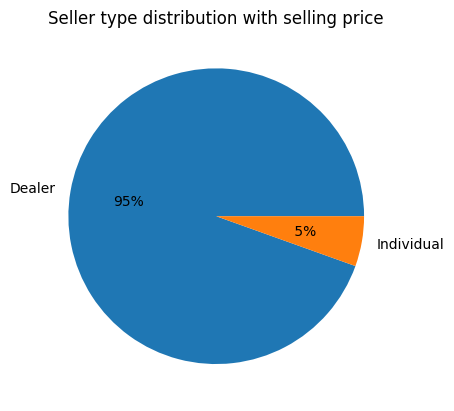

In [51]:
##let's see the distribution with selling price
plt.title("Seller type distribution with selling price")
index=data.groupby("Seller_Type")["Selling_Price"].sum().index
value=data.groupby("Seller_Type")["Selling_Price"].sum().values
# plt.legend()
plt.pie(value,labels=index,autopct="%2.f%%")
plt.show()


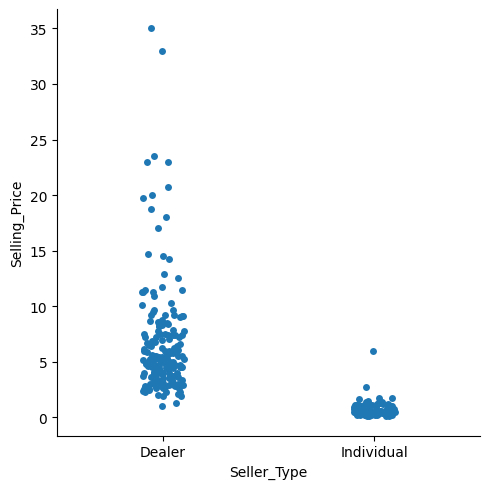

In [52]:
sns.catplot(x="Seller_Type",y="Selling_Price",data=data)
plt.show()

## Observation:
Most of Selling Price is generated by the Dealer  about(95%)

In [53]:
data=pd.get_dummies(data,columns=["Seller_Type"])

In [54]:
data.head(1)

,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,Manual,0,0,0,0,0,0,0,0,0,0,9,0,1,1,0


In [55]:
data["Transmission"].value_counts()

Manual       257
Automatic     34
Name: Transmission, dtype: int64

<Axes: xlabel='count', ylabel='Transmission'>

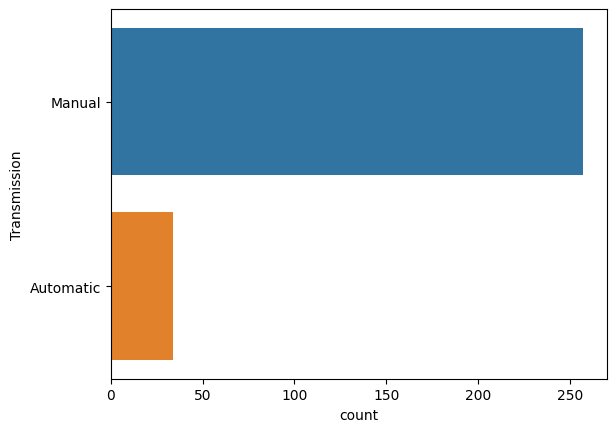

In [56]:
sns.countplot(y=data["Transmission"])

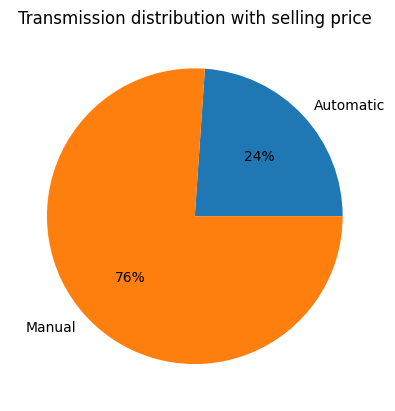

In [57]:
##let's see the distribution with selling price
plt.title("Transmission distribution with selling price")
index=data.groupby("Transmission")["Selling_Price"].sum().index
value=data.groupby("Transmission")["Selling_Price"].sum().values
# plt.legend()
plt.pie(value,labels=index,autopct="%2.f%%")
plt.show()


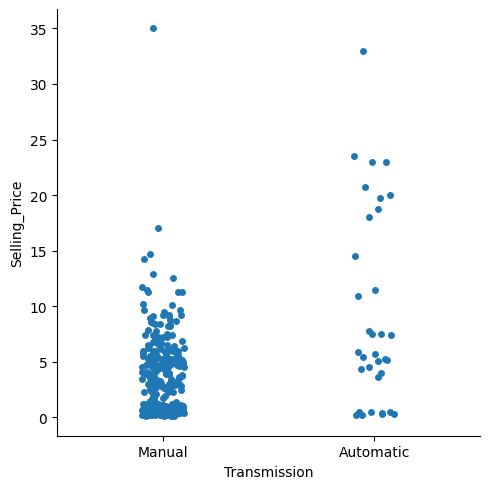

In [58]:
sns.catplot(x="Transmission",y="Selling_Price",data=data)
plt.show()

## Observation:
most of the selling price is generating by Manual Transmission about(75%)

In [59]:
data=pd.get_dummies(data,columns=["Transmission"])

In [60]:
data.head(1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,0,9,0,1,1,0,0,1


In [61]:
data["Owner"].value_counts()

0    281
1     10
Name: Owner, dtype: int64

this is not too much information i.e do not have variation so we can drop that....

In [62]:
data=data.drop("Owner",axis=1)

In [63]:
data.head(1)

,Selling_Price,Present_Price,Kms_Driven,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,9,0,1,1,0,0,1


In [64]:
len(data.columns)

19

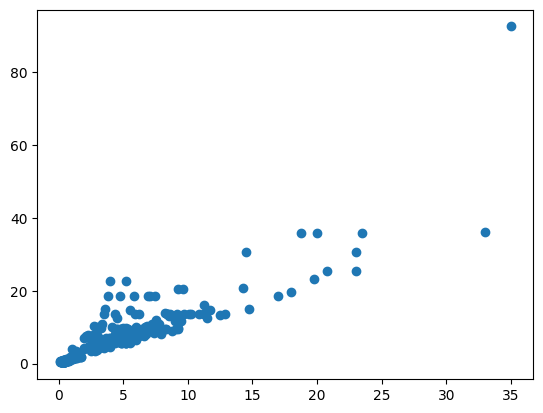

In [65]:
plt.scatter("Selling_Price","Present_Price",data=data)

In [66]:
data.head(1)

,Selling_Price,Present_Price,Kms_Driven,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,9,0,1,1,0,0,1


# Feature Selection

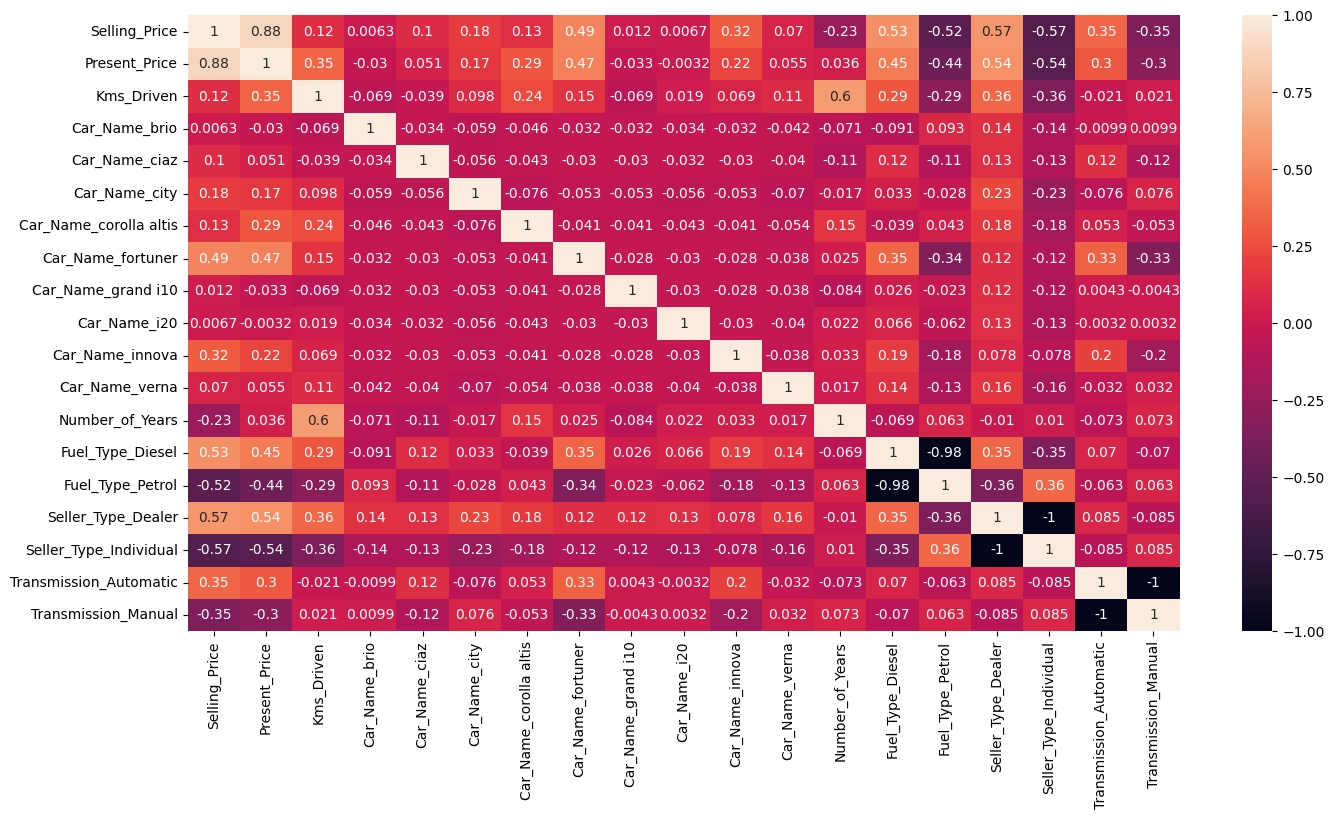

In [67]:
#feature selection firslty basic on correration
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the Heatmap we can cleary see that selling price and  present price are highly correlated so we can drop present price

In [68]:
data=data.drop("Present_Price",axis=1)

In [69]:
data.head()

,Selling_Price,Kms_Driven,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,27000,0,0,0,0,0,0,0,0,0,9,0,1,1,0,0,1
1,4.75,43000,0,0,0,0,0,0,0,0,0,10,1,0,1,0,0,1
2,7.25,6900,0,1,0,0,0,0,0,0,0,6,0,1,1,0,0,1
3,2.85,5200,0,0,0,0,0,0,0,0,0,12,0,1,1,0,0,1
4,4.60,42450,0,0,0,0,0,0,0,0,0,9,1,0,1,0,0,1


In [70]:
y=data.iloc[:,1]
y.head(1)

0    27000
Name: Kms_Driven, dtype: int64

In [71]:
x=data.drop("Selling_Price",axis=1)

In [72]:
x1=x.copy()
y1=y.copy()

In [73]:
## on the basis of Feature importance
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()

In [74]:
selection.fit(x1,y1)

ExtraTreesRegressor()

In [75]:
imp_features=selection.feature_importances_

In [76]:
imp_features=pd.Series(imp_features,index=x1.columns).sort_values(ascending=False)

<Axes: >

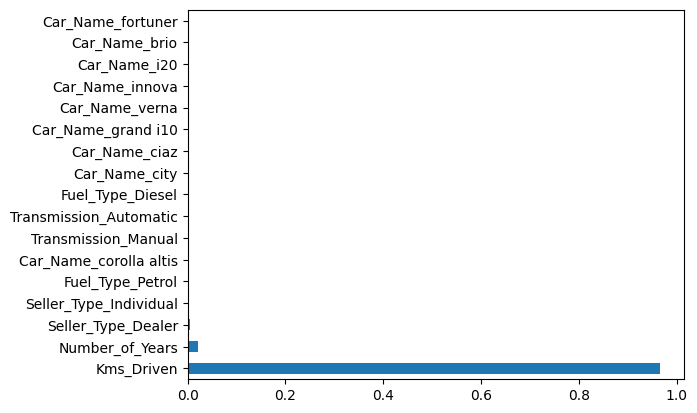

In [77]:
imp_features.plot(kind="barh")

In [78]:
# as we can see that some feature are useless theyare not much importanct for our model so can just drop them...
new_x=x1.drop(["Seller_Type_Individual","Fuel_Type_Petrol","Car_Name_brio","Car_Name_grand i10","Car_Name_ciaz"],axis=1)

In [79]:
new_x.shape

(291, 12)

# Split the data in train test 

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [81]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(new_x, y, test_size=0.33, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression
reg_m=LinearRegression()
reg_m.fit(x1_train,y1_train)

LinearRegression()

In [83]:
reg_m.score(x1_train,y1_train)

1.0

In [84]:
reg_m.score(x1_test,y1_test)

1.0

In [85]:
x_train.shape

(194, 17)

In [86]:
x_test.shape

(97, 17)

# train the model

In [87]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [88]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [89]:
model.score(x_train,y_train)

0.9998618207481647

In [90]:
model.score(x_test,y_test)

0.9996598269807169

In [91]:
from sklearn.metrics import r2_score

In [92]:
y_pred=model.predict(x_test)

In [93]:
r2_score(y_pred,y_test)

0.9996559284384882

In [94]:
# model1=RandomForestRegressor()
# model1.fit(x1_train,y1_train)

In [95]:
# model1.score(x1_train,y1_train)

In [96]:
# model1.score(x1_test,y1_test)

## as our model is overfit we need to hypertune our model 

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
hyperparameter_space = {
    "n_estimators":[i for i in range(10,30,2)],
    'max_depth':[i for i in range(2,10)], 
                        "criterion":["squared_error","absolute_error"],
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

In [99]:
rf_model=RandomizedSearchCV(model,param_distributions=hyperparameter_space,scoring="neg_mean_squared_error",cv=5,n_iter=10,verbose=1,)

In [100]:
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\asdf\Documents\D.S\End-to-End Projects\Car-price-End-to-End-Project\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asdf\Documents\D.S\End-to-End Projects\Car-price-End-to-End-Project\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asdf\Documents\D.S\End-to-End Projects\Car-price-End-to-End-Project\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             20, 30],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              8, 10],
                                        'n_estimators': [10, 12, 14, 16, 18, 20,
                                                         22, 24, 26, 28]},
                   scoring='neg_mean_squared_error', verbose=1)

In [101]:
rf_model.best_params_

{'n_estimators': 18,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'criterion': 'absolute_error'}

In [102]:
yp=rf_model.predict(x_test)

In [103]:
r2_score(yp,y_test)

0.9995108994382766

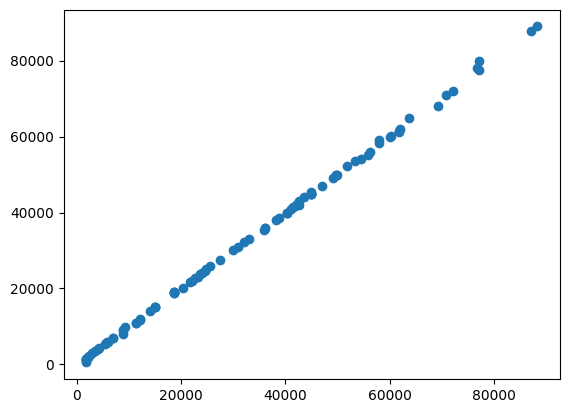

In [104]:
plt.scatter(yp,y_test)

These are in one line mean there is no much difference b/w real y and predicted y

## Now save the model in pickle file

In [105]:
import pickle 

In [106]:
pickle.dump(rf_model,open("Model.pkl","wb"))

In [107]:
m=pickle.load(open("Model.pkl","rb"))

In [108]:
x_test.head(1)

,Kms_Driven,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
91,58242,0,0,0,0,0,0,0,1,0,9,1,0,1,0,0,1


In [109]:
data.head()

,Selling_Price,Kms_Driven,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_verna,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,27000,0,0,0,0,0,0,0,0,0,9,0,1,1,0,0,1
1,4.75,43000,0,0,0,0,0,0,0,0,0,10,1,0,1,0,0,1
2,7.25,6900,0,1,0,0,0,0,0,0,0,6,0,1,1,0,0,1
3,2.85,5200,0,0,0,0,0,0,0,0,0,12,0,1,1,0,0,1
4,4.60,42450,0,0,0,0,0,0,0,0,0,9,1,0,1,0,0,1


In [110]:
m.predict([[4052,1,0,0,0,0,0,19,1,0,1,1]])

c:\Users\asdf\Documents\D.S\End-to-End Projects\Car-price-End-to-End-Project\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but RandomForestRegressor is expecting 17 features as input.